<a href="https://colab.research.google.com/github/Raju-boda/NLP/blob/main/SPAM_USING_W2V_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 

from keras.preprocessing.text import Tokenizer 
#from keras.preprocessing.sequence import pad_sequences

In [51]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
df=df.rename(columns={'Category':'v1','Message':'v2'})
df['label_in_num']=df['v1'].map({'ham':0,'spam':1})
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,label_in_num
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [54]:
df=df.iloc[:,[0,1]]
df.columns=['labels','text']
df.head(10)

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of Both labels ')

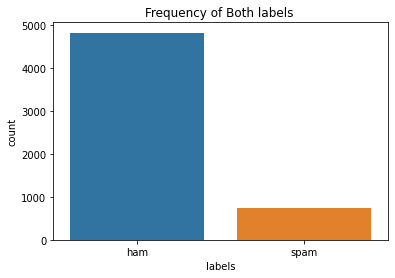

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.labels)
plt.title('Frequency of Both labels ')

In [56]:
df[df['labels']=='ham'].value_counts()

labels  text                                                                                                                                    
ham     Sorry, I'll call later                                                                                                                      30
        I cant pick the phone right now. Pls send a message                                                                                         12
        Ok...                                                                                                                                       10
        Okie                                                                                                                                         4
        Ok.                                                                                                                                          4
                                                                                                    

In [57]:
X=df['text']
Y=df.labels
X,Y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                Will Ì_ b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: text, Length: 5572, dtype: object, 0        ham
 1        ham
 2       spam
 3        ham
 4        ham
         ... 
 5567    spam
 5568     ham
 5569     ham
 5570     ham
 5571     ham
 Name: labels, Length: 5572, dtype: object)

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
Y=Y.reshape(-1,1)
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [60]:
from nltk.corpus import stopwords   #remove stopwords
from nltk.stem.porter import PorterStemmer   #stemming
import re
#Different models for converting text to vector
from sklearn.feature_extraction.text import CountVectorizer #BOW
from sklearn.feature_extraction.text import TfidfVectorizer    # Tf-idf
from gensim.models import Word2Vec

In [61]:
port_stem=PorterStemmer()
corpus=[]
for i in range(len(df['text'])):
    text_1=re.sub('[^a-zA-Z]'," ",df['text'][i])
    text_1=text_1.lower()
    text_1=text_1.split()
    text_1=[port_stem.stem(word) for word in text_1 if word not in stopwords.words('english')]
    text_1=' '.join(text_1)
    corpus.append(text_1)

In [62]:
len(corpus),len(Y)

(5572, 5572)

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval=train_test_split(corpus,Y,test_size=0.2,random_state=2)

In [64]:
len(xtrain),len(ytrain),len(xval),len(yval)

(4457, 4457, 1115, 1115)

In [65]:
documents=[text.split() for text in xtrain]

In [66]:
len(documents)

4457

In [68]:
import gensim
w2v_model = gensim.models.Word2Vec(size=300, 
                                            window=3, 
                                            min_count=5, 
                                            workers=8)
# min_count (int, optional) – Ignores all words with total frequency lower than this.
# workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).
# window (int, optional) – Maximum distance between the current and predicted word within a sentence.
# vector_size (int, optional) – Dimensionality of the word vectors.

In [69]:
w2v_model.build_vocab(documents)

In [70]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 1339


In [71]:
w2v_model.train(documents,total_examples=len(documents),epochs=32)

(927875, 1279456)

In [84]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 5538


In [85]:
from keras_preprocessing.sequence import pad_sequences
x_train = pad_sequences(tokenizer.texts_to_sequences(xtrain), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(xval), maxlen=300)

In [86]:
x_train

array([[   0,    0,    0, ...,  997,   15,  404],
       [   0,    0,    0, ...,  122, 1600,   62],
       [   0,    0,    0, ..., 2000,   88,  998],
       ...,
       [   0,    0,    0, ...,  354,    6,    8],
       [   0,    0,    0, ...,    0,    0,  903],
       [   0,    0,    0, ...,    3, 1664, 2862]], dtype=int32)

In [87]:
len(x_train),len(ytrain),len(x_test),len(yval)

(4457, 4457, 1115, 1115)

In [88]:
embedding_matrix = np.zeros((vocab_size, 300))
print(embedding_matrix)
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5538, 300)


In [89]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.23456825,  0.02478511, -0.16375476, ...,  0.31879991,
        -0.13549717, -0.02708923],
       [-0.22882313, -0.11831355,  0.01474713, ...,  0.09367118,
        -0.30708578, -0.20215243],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [90]:
from keras.layers import Activation, Dense, Dropout, Embedding
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

In [91]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# Build The model
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 300)          1661400   
                                                                 
 dropout_3 (Dropout)         (None, 300, 300)          0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                93440     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,754,905
Trainable params: 93,505
Non-trainable params: 1,661,400
_________________________________________________________________


In [92]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [ ]:
history = model.fit(x_train, ytrain,batch_size=32,epochs=10,validation_split=0.1,verbose=1,callbacks=callbacks)

Epoch 1/10
126/126 [==============================] - ETA: 0s - loss: 0.1137 - accuracy: 0.9648

126/126 [==============================] - 83s 640ms/step - loss: 0.1137 - accuracy: 0.9648 - val_loss: 0.0699 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 2/10
126/126 [==============================] - ETA: 0s - loss: 0.0560 - accuracy: 0.9843

126/126 [==============================] - 77s 614ms/step - loss: 0.0560 - accuracy: 0.9843 - val_loss: 0.0686 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 3/10
126/126 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9840

126/126 [==============================] - 78s 616ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0678 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 4/10
126/126 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9863

126/126 [==============================] - 77s 614ms/step - loss: 0.0496 - accuracy: 0.9863 - val_loss: 0.0689 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 5/10
126/126 [==============================] - ETA: 0s - loss: 0.0451 - accuracy: 0.9868

126/126 [==============================] - 77s 614ms/step - loss: 0.0451 - accuracy: 0.9868 - val_loss: 0.0678 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 6/10
126/126 [==============================] - ETA: 0s - loss: 0.0394 - accuracy: 0.9883

126/126 [==============================] - 77s 615ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0775 - val_accuracy: 0.9753 - lr: 0.0010
Epoch 7/10
126/126 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9878

126/126 [==============================] - 77s 614ms/step - loss: 0.0411 - accuracy: 0.9878 - val_loss: 0.0670 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 8/10
126/126 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9890

126/126 [==============================] - 77s 613ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0711 - val_accuracy: 0.9843 - lr: 0.0010
Epoch 9/10
126/126 [==============================] - ETA: 0s - loss: 0.0337 - accuracy: 0.9900

126/126 [==============================] - 77s 615ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0669 - val_accuracy: 0.9821 - lr: 0.0010
Epoch 10/10
100/126 [======================>.......] - ETA: 15s - loss: 0.0332 - accuracy: 0.9906

In [83]:
score = model.evaluate(x_test, yval, batch_size=32)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

35/35 [==============================] - 7s 189ms/step - loss: 0.4085 - accuracy: 0.8583

ACCURACY: 0.8582959771156311
LOSS: 0.40851467847824097
